In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import pyswmm
from pyswmm import Simulation, LidControls, LidGroups, Subcatchments, Nodes
import os
import swmm
import swmmio as sio

In [76]:
#SUBBASIN DICTIONARIES (These will be reference throughout the code)


#Subbasin LID Feasble Area Dictionaries
raingarden_feasible_areas = {'70151': 5808.493035, '70191': 5878.870933, '70231': 0.0, '70291': 4458.486032, '70311': 0.0, '70531': 6047.068894, '70571': 5793.221106, '70731': 24756.97, '70751': 0.0, '70771': 0.0, '70851': 9031.770973, '70951': 0.0, '71051': 0.0, '71171': 0.0, '71191': 22486.50283, '71231': 773.4261921, '71251': 0.0, '71271': 0.0, '71341': 0.0, '71361': 0.0, '71391': 9100.057241, '71461': 43487.54768, '71491': 11928.8107, '71541': 35974.21977, '71611': 11351.63504, '71651': 30721.36677, '71661': 29955.18885, '71771': 11203.52403, '71911': 0.0, '71981': 2152.78, '71991': 20611.30848, '72021': 0.0, '72031': 5329.47602, '72051': 13666.5306, '72061': 0.0, '72071': 20636.12704, '72091': 3221.729454, '72121': 33794.66279, '72161': 11981.76905, '72191': 0.0, '72231': 3229.928489, '72241': 40557.9266, '72261': 141930.5727, '72311': 44415.64753, '72331': 16565.88793, '72371': 84103.34056, '72391': 12165.10336, '72411': 15545.60908, '72421': 14272.44135, '72551': 43580.20595, '72591': 55583.9368, '72631': 19815.3296, '72671': 44162.83417, '72731': 21000.83666, '72781': 23024.24035, '72901': 11161.08276, '72951': 43306.46711, '73001': 91815.73708, '73081': 13920.64411, '73121': 23892.97048, '73171': 0.0, '73181': 3385.30813, '73201': 9353.089577, '73211': 12806.63365, '73271': 10014.24695, '73301': 636.1767258, '73321': 671.0354007, '73341': 10877.37633, '73391': 9520.570522, '73401': 34881.08583, '73421': 0.0, '73461': 5787.304599, '73501': 379554.1623, '73531': 20854.9434, '73551': 11511.16521, '73571': 8611.12, '73601': 715484.6466, '73602': 315553.9121, '73631': 100553.3249, '73661': 32904.65401, '73671': 7756.228813, '73691': 3978.729612, '73751': 15212.84681, '73811': 4632.390388, '73841': 0.0, '73871': 0.0, '73911': 0.0}
permeablepavement_feasible_areas = {'70151': 12916.68, '70191': 0.0, '70231': 13993.0716, '70291': 0.0, '70311': 8611.118396, '70531': 0.0, '70571': 3229.17, '70731': 4305.56, '70751': 0.0, '70771': 0.0, '70851': 0.0, '70951': 0.0, '71051': 0.0, '71171': 988.7638887, '71191': 5204.229895, '71231': 15211.75947, '71251': 3352.216737, '71271': 5381.95, '71341': 0.0, '71361': 13993.07, '71391': 0.0, '71461': 26909.75, '71491': 3229.17, '71541': 5381.95, '71611': 0.0, '71651': 7534.73, '71661': 23680.58, '71771': 0.0, '71911': 3824.720936, '71981': 5381.95, '71991': 0.0, '72021': 0.0, '72031': 46862.92807, '72051': 0.0, '72061': 14329.82355, '72071': 0.0, '72091': 59543.3042, '72121': 0.0, '72161': 0.0, '72191': 15369.92325, '72231': 18733.53422, '72241': 0.0, '72261': 0.0, '72311': 0.0, '72331': 0.0, '72371': 0.0, '72391': 6953.536868, '72411': 581.1931315, '72421': 0.0, '72551': 0.0, '72591': 0.0, '72631': 3592.054222, '72671': 0.0, '72731': 9935.438827, '72781': 12553.53077, '72901': 0.0, '72951': 14386.89196, '73001': 0.0, '73081': 9687.51, '73121': 12827.45501, '73171': 9776.734992, '73181': 7534.73, '73201': 30138.92, '73211': 1076.39, '73271': 0.0, '73301': 17222.24, '73321': 6647.736192, '73341': 0.0, '73391': 1076.39, '73401': 0.0, '73421': 7345.333808, '73461': 25833.36, '73501': 0.0, '73531': 32600.9754, '73551': 0.0, '73571': 20832.98346, '73601': 10073.05113, '73602': 0.0, '73631': 0.0, '73661': 0.0, '73671': 0.0, '73691': 0.0, '73751': 0.0, '73811': 0.0, '73841': 0.0, '73871': 0.0, '73911': 0.0}
greenroof_feasible_areas = {'70151': 4886.247161, '70191': 1100.995048, '70231': 6954.042836, '70291': 1473.573669, '70311': 0.0, '70531': 1094.307599, '70571': 21527.8, '70731': 28152.0185, '70751': 15584.42482, '70771': 8611.12, '70851': 699.1804481, '70951': 2133.225406, '71051': 1076.39, '71171': 17221.8569, '71191': 6122.886662, '71231': 11430.39241, '71251': 8604.241362, '71271': 4312.438649, '71341': 16145.85, '71361': 7534.73, '71391': 9687.51, '71461': 18298.63, '71491': 14826.39563, '71541': 6458.34, '71611': 3229.17, '71651': 8854.184373, '71661': 2289.119013, '71771': 0.0, '71911': 8611.503098, '71981': 7398.390987, '71991': 1080.538838, '72021': 19375.02, '72031': 36357.55315, '72051': 1397.479236, '72061': 36597.26, '72071': 235.5580164, '72091': 57506.31142, '72121': 1541.026025, '72161': 1076.39, '72191': 33986.83858, '72231': 24752.26977, '72241': 1076.39, '72261': 59197.12939, '72311': 36569.90714, '72331': 151.8481564, '72371': 5230.101844, '72391': 5381.95, '72411': 7562.082857, '72421': 0.0, '72551': 2122.505014, '72591': 2152.78, '72631': 12921.38023, '72671': 1173.503467, '72731': 29062.53, '72781': 7534.73, '72901': 290.6647389, '72951': 9687.51, '73001': 3339.91685, '73081': 21384.84111, '73121': 9357.285313, '73171': 16289.43527, '73181': 6990.681118, '73201': 30615.11554, '73211': 1296.256317, '73271': 3229.17, '73301': 16630.5235, '73321': 26148.32693, '73341': 0.0, '73391': 0.0, '73401': 98283.16103, '73421': 20630.7033, '73461': 71257.33823, '73501': 173371.3127, '73531': 52908.96152, '73551': 10049.59107, '73571': 37450.83357, '73601': 216603.9892, '73602': 339062.85, '73631': 21574.91944, '73661': 0.0, '73671': 1076.39, '73691': 1086.235503, '73751': 962.4582949, '73811': 0.0, '73841': 0.0, '73871': 0.0, '73911': 0.0}
bioretention_feasible_areas = {'70151': 0.0, '70191': 0.0, '70231': 0.0, '70291': 0.0, '70311': 0.0, '70531': 0.0, '70571': 0.0, '70731': 1076.39, '70751': 0.0, '70771': 0.0, '70851': 0.0, '70951': 0.0, '71051': 0.0, '71171': 0.0, '71191': 2152.78, '71231': 0.0, '71251': 0.0, '71271': 0.0, '71341': 0.0, '71361': 0.0, '71391': 0.0, '71461': 3657.197829, '71491': 0.0, '71541': 0.0, '71611': 648.362171, '71651': 0.0, '71661': 2152.78, '71771': 0.0, '71911': 0.0, '71981': 0.0, '71991': 2152.78, '72021': 0.0, '72031': 0.0, '72051': 0.0, '72061': 0.0, '72071': 0.0, '72091': 0.0, '72121': 5381.95, '72161': 0.0, '72191': 0.0, '72231': 0.0, '72241': 0.0, '72261': 3229.17, '72311': 3229.17, '72331': 2152.78, '72371': 2135.260515, '72391': 0.0, '72411': 1076.39, '72421': 0.0, '72551': 1076.39, '72591': 1076.39, '72631': 1076.39, '72671': 1076.39, '72731': 3229.17, '72781': 7.996802699, '72901': 1076.39, '72951': 1068.393197, '73001': 9687.51, '73081': 0.0, '73121': 5381.95, '73171': 0.0, '73181': 0.0, '73201': 0.0, '73211': 0.0, '73271': 0.0, '73301': 0.0, '73321': 0.0, '73341': 0.0, '73391': 1076.39, '73401': 7534.73, '73421': 0.0, '73461': 0.0, '73501': 16145.85, '73531': 1076.39, '73551': 0.0, '73571': 4305.56, '73601': 60277.84, '73602': 15509.44566, '73631': 636.4043392, '73661': 1076.39, '73671': 1076.39, '73691': 0.0, '73751': 2152.78, '73811': 0.0, '73841': 0.0, '73871': 0.0, '73911': 0.0}


#Other Subbasin Characteristic Dictionaries
subbasin_areas = {'70151': 2523866.4, '70191': 2550220.2, '70231': 520542.0, '70291': 306226.8, '70311': 353445.84, '70531': 1114613.28, '70571': 1173680.64, '70731': 1767751.92, '70751': 850683.24, '70771': 258485.04, '70851': 898729.92, '70951': 986721.12, '71051': 678054.96, '71171': 2165149.8, '71191': 1435563.36, '71231': 694738.44, '71251': 567238.32, '71271': 526248.36, '71341': 316071.36, '71361': 327092.04, '71391': 1518414.48, '71461': 858306.24, '71491': 552776.4, '71541': 980709.84, '71611': 644905.8, '71651': 601868.52, '71661': 1557792.72, '71771': 966291.48, '71911': 2388438.36, '71981': 1351884.6, '71991': 826812.36, '72021': 777241.08, '72031': 677270.88, '72051': 883266.12, '72061': 926869.68, '72071': 683587.08, '72091': 1288983.96, '72121': 1362469.68, '72161': 1283364.72, '72191': 630443.88, '72231': 1097668.44, '72241': 1769232.96, '72261': 7416525.6, '72311': 5366069.28, '72331': 847808.28, '72371': 2017699.2, '72391': 1030455.36, '72411': 2353198.32, '72421': 638154.0, '72551': 1666954.08, '72591': 930398.04, '72631': 952047.36, '72671': 1011681.0, '72731': 954530.28, '72781': 1649965.68, '72901': 2321443.08, '72951': 1785524.4, '73001': 4018584.24, '73081': 1531569.6, '73121': 1481911.2, '73171': 677488.68, '73181': 626044.32, '73201': 922731.48, '73211': 1332718.2, '73271': 1581576.48, '73301': 1379980.8, '73321': 629311.32, '73341': 694302.84, '73391': 762430.68, '73401': 2177956.44, '73421': 672827.76, '73461': 708067.8, '73501': 6866406.36, '73531': 677662.92, '73551': 603218.88, '73571': 368648.28, '73601': 21575137.32, '73602': 16835678.64, '73631': 3066014.16, '73661': 813134.52, '73671': 877385.52, '73691': 773407.8, '73751': 2132218.44, '73811': 1416092.04, '73841': 1316601.0, '73871': 1052932.32, '73911': 1619691.48}
subbasin_imperv_areas = {'70151': 393672.6811, '70191': 291388.1601, '70231': 287838.9043, '70291': 123443.0853, '70311': 202220.5029, '70531': 179330.1306, '70571': 443017.4944, '70731': 564991.1912, '70751': 321694.374, '70771': 75322.54066, '70851': 186774.052, '70951': 233320.076, '71051': 217628.52, '71171': 809506.2072, '71191': 616933.354, '71231': 303635.4352, '71251': 154844.7166, '71271': 306039.7338, '71341': 111592.1544, '71361': 161560.5713, '71391': 533510.1117, '71461': 249870.1126, '71491': 231414.3121, '71541': 580678.2963, '71611': 224459.4637, '71651': 150358.7937, '71661': 619253.7621, '71771': 266184.314, '71911': 568376.6765, '71981': 505091.1243, '71991': 196260.4499, '72021': 155728.0228, '72031': 472172.9394, '72051': 248595.2495, '72061': 536268.2595, '72071': 152193.8275, '72091': 915049.7132, '72121': 282971.3278, '72161': 138757.3935, '72191': 463470.8184, '72231': 794953.4376, '72241': 340435.8062, '72261': 880119.093, '72311': 1048046.991, '72331': 202371.8364, '72371': 717534.1895, '72391': 320873.4946, '72411': 331918.623, '72421': 191388.7661, '72551': 420839.227, '72591': 230720.106, '72631': 418386.7328, '72671': 294287.8861, '72731': 506340.1323, '72781': 530480.4658, '72901': 411661.5014, '72951': 419348.2606, '73001': 1243591.079, '73081': 545667.6171, '73121': 717393.2119, '73171': 390782.2455, '73181': 431162.9836, '73201': 494805.5288, '73211': 431094.3562, '73271': 314828.6141, '73301': 632569.3989, '73321': 437044.1255, '73341': 121648.8006, '73391': 164067.458, '73401': 542180.4762, '73421': 504230.5799, '73461': 532764.3741, '73501': 2418760.304, '73531': 469972.7883, '73551': 412975.7096, '73571': 253029.1199, '73601': 8225089.601, '73602': 8116312.316, '73631': 472442.1219, '73661': 163244.8862, '73671': 202711.1505, '73691': 248519.1284, '73751': 390963.5732, '73811': 322741.5368, '73841': 266335.2163, '73871': 205321.8024, '73911': 246452.2556}
subbasin_flowlengths = {'70151': 1941.36, '70191': 1889.052, '70231': 867.57, '70291': 1020.756, '70311': 706.892, '70531': 2476.918, '70571': 938.945, '70731': 2055.525, '70751': 1134.244, '70771': 689.293, '70851': 1634.054, '70951': 897.019, '71051': 904.073, '71171': 1732.12, '71191': 1688.898, '71231': 1263.161, '71251': 1134.477, '71271': 877.081, '71341': 632.143, '71361': 594.713, '71391': 1518.414, '71461': 1226.152, '71491': 1105.553, '71541': 980.71, '71611': 1172.556, '71651': 668.743, '71661': 2596.321, '71771': 1610.486, '71911': 2514.146, '71981': 2253.141, '71991': 1378.021, '72021': 1413.166, '72031': 967.53, '72051': 1039.137, '72061': 1425.953, '72071': 390.621, '72091': 716.102, '72121': 1009.237, '72161': 1425.961, '72191': 840.592, '72231': 954.494, '72241': 1769.233, '72261': 2852.51, '72311': 2683.035, '72331': 1059.76, '72371': 2123.894, '72391': 936.778, '72411': 1094.511, '72421': 1823.297, '72551': 1666.954, '72591': 1094.586, '72631': 793.373, '72671': 1445.259, '72731': 1272.707, '72781': 1833.295, '72901': 1105.449, '72951': 915.654, '73001': 2232.547, '73081': 957.231, '73121': 4234.032, '73171': 615.899, '73181': 2086.814, '73201': 1419.587, '73211': 1665.898, '73271': 1265.261, '73301': 2759.962, '73321': 968.171, '73341': 925.737, '73391': 476.519, '73401': 1893.875, '73421': 480.591, '73461': 708.068, '73501': 4039.063, '73531': 1042.558, '73551': 928.029, '73571': 1053.281, '73601': 7705.406, '73602': 5707.01, '73631': 1277.506, '73661': 1084.179, '73671': 877.386, '73691': 1104.868, '73751': 1854.103, '73811': 1416.092, '73841': 975.26, '73871': 1108.35, '73911': 1079.794}
subbasin_percimperv = {'70151': 15.598, '70191': 11.426, '70231': 55.296, '70291': 40.311, '70311': 57.214, '70531': 16.089, '70571': 37.746, '70731': 31.961, '70751': 37.816, '70771': 29.14, '70851': 20.782, '70951': 23.646, '71051': 32.096, '71171': 37.388, '71191': 42.975, '71231': 43.705, '71251': 27.298, '71271': 58.155, '71341': 35.306, '71361': 49.393, '71391': 35.136, '71461': 29.112, '71491': 41.864, '71541': 59.21, '71611': 34.805, '71651': 24.982, '71661': 39.752, '71771': 27.547, '71911': 23.797, '71981': 37.362, '71991': 23.737, '72021': 20.036, '72031': 69.717, '72051': 28.145, '72061': 57.858, '72071': 22.264, '72091': 70.99, '72121': 20.769, '72161': 10.812, '72191': 73.515, '72231': 72.422, '72241': 19.242, '72261': 11.867, '72311': 19.531, '72331': 23.87, '72371': 35.562, '72391': 31.139, '72411': 14.105, '72421': 29.991, '72551': 25.246, '72591': 24.798, '72631': 43.946, '72671': 29.089, '72731': 53.046, '72781': 32.151, '72901': 17.733, '72951': 23.486, '73001': 30.946, '73081': 35.628, '73121': 48.41, '73171': 57.681, '73181': 68.871, '73201': 53.624, '73211': 32.347, '73271': 19.906, '73301': 45.839, '73321': 69.448, '73341': 17.521, '73391': 21.519, '73401': 24.894, '73421': 74.942, '73461': 75.242, '73501': 35.226, '73531': 69.352, '73551': 68.462, '73571': 68.637, '73601': 38.123, '73602': 48.209, '73631': 15.409, '73661': 20.076, '73671': 23.104, '73691': 32.133, '73751': 18.336, '73811': 22.791, '73841': 20.229, '73871': 19.5, '73911': 15.216}


In [77]:
### Generating random area allocation scenarios for each subcatchment. 
### Random LID scenario generator.  

allocations_fractions_list = [0.2,0.4,0.6,0.8,1]

for key in raingarden_feasible_areas:
    raingarden_assigned_areas = raingarden_feasible_areas
    raingarden_assigned_areas[key] *= random.choice(allocations_fractions_list)
            

for key in greenroof_feasible_areas:
    greenroof_assigned_areas = greenroof_feasible_areas
    greenroof_assigned_areas[key] *= random.choice(allocations_fractions_list)
    
    
for key in permeablepavement_feasible_areas:
    permeablepavement_assigned_areas = permeablepavement_feasible_areas
    permeablepavement_assigned_areas[key] *= random.choice(allocations_fractions_list)
    

for key in bioretention_feasible_areas:
    bioretention_assigned_areas = bioretention_feasible_areas
    bioretention_assigned_areas[key] *= random.choice(allocations_fractions_list)

    
for key in subbasin_imperv_areas:
    updated_sb_percent_impervious_areas = subbasin_imperv_areas 
    updated_sb_percent_impervious_areas[key] = 100*((subbasin_imperv_areas[key]) - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]/subbasin_areas[key])
    

In [78]:
#Currently under construction. I want this block to calculate total implemented LID areas for each subbasin. It currently only does it for sb 73461
subbasinlist =['70151','70191','70231','70291','70311','70531','70571','70731','70751','70771','70851','70951','71051','71171','71191','71231','71251','71271','71341','71361','71391','71461','71491','71541','71611','71651','71661','71771','71911','71981','71991','72021','72031', '72051','72061','72071','72091','72121','72161','72191','72231','72241','72261','72311','72331','72371','72391','72411','72421','72551','72591','72631','72671','72731','72781','72901','72951','73001','73081','73121','73171','73181','73201','73211','73271','73301','73321','73341','73391','73401','73421','73461','73501','73531','73551','73571','73601','73602','73631','73661','73671','73691','73751','73811','73841','73871','73911']
lid_total_areas = dict.fromkeys(subbasinlist)

#sb_LID_total_area['73461'] = gr_feasible_area_dict['73461'] + pp_feasible_area_dict['73461']

for key in lid_total_areas:
    lid_total_areas[key] = greenroof_assigned_areas[key] + permeablepavement_assigned_areas[key] + raingarden_assigned_areas[key] + bioretention_assigned_areas[key]

lid_total_areas


{'70151': 14611.240078400002,
 '70191': 5363.6937752,
 '70231': 6988.0372072,
 '70291': 2969.806353,
 '70311': 6888.8947168,
 '70531': 5275.378154800001,
 '70571': 29904.357106,
 '70731': 49861.9208,
 '70751': 12467.539856000001,
 '70771': 8611.12,
 '70851': 2086.0263738400004,
 '70951': 1706.5803248000002,
 '71051': 861.1120000000001,
 '71171': 10530.866917739999,
 '71191': 11297.567874600001,
 '71231': 20247.972149260004,
 '71251': 10615.5714042,
 '71271': 1938.8777298,
 '71341': 9687.51,
 '71361': 13131.957999999999,
 '71391': 11155.0497928,
 '71461': 66822.39327560001,
 '71491': 8962.154392,
 '71541': 27827.593862,
 '71611': 3175.5058764,
 '71651': 22121.895331800002,
 '71661': 42523.1162578,
 '71771': 11203.52403,
 '71911': 6504.377988,
 '71981': 8314.0385922,
 '71991': 4768.9254636000005,
 '72021': 7750.008000000001,
 '72031': 61436.664754000005,
 '72051': 8758.9100544,
 '72061': 13051.381420000002,
 '72071': 8442.89722912,
 '72091': 94691.4369428,
 '72121': 21969.598084,
 '72161

In [80]:
#Display updated dictionaries
#print(greenroof_assigned_areas)
#print(permeablepavement_assigned_areas)
#print(raingarden_assigned_areas)
#print(bioretention_assigned_areas)
print(updated_sb_percent_impervious_areas)

{'70151': 39171817.814134836, '70191': 29072756.30712, '70231': 28644808.49801064, '70291': 12314837.05662, '70311': 20222048.340933427, '70531': 17889240.75604, '70571': 42148969.219894476, '70731': 54246957.54257548, '70751': 30922683.414400004, '70771': 6671142.066000001, '70851': 18649437.982076, '70951': 23161349.56752, '71051': 21676740.8, '71171': 79917309.29686655, '71191': 61203504.39453565, '71231': 29906325.634033594, '71251': 14624047.16921711, '71271': 30517724.402479693, '71341': 10190464.440000001, '71361': 15402582.418791132, '71391': 52963510.77, '71461': 24621035.52478453, '71491': 22548375.26796542, '71541': 57551162.32024379, '71611': 22381362.97, '71651': 14504627.556486184, '71661': 61788028.461165294, '71771': 26618431.400000002, '71911': 56493207.39797215, '71981': 50065208.81153712, '71991': 19604434.213239998, '72021': 14797801.48, '72031': 45035835.2154981, '72051': 24803625.78056, '72061': 52894880.13158195, '72071': 15200538.108688002, '72091': 88054588.015

The following block updates subcatchment percent impervious and widths. It is currently only operational for subbasin 73461

In [6]:
#initialize a baseline model object in swmmio
baseline = sio.Model(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\MeadowCreekSWMM')

#isolate subcatchments dataframe
subcatchments = baseline.inp.subcatchments

#Set subcatchment parameters

#Percent Impervious Adjustment
subcatchments.loc['73461','PercImperv'] = updated_sb_percent_impervious_area_dict['73461']

#Width Adjustment((SUBBASIN AREA/Flow Length) - LID Width)

subcatchments.loc['73461','Width'] = ((subcatchments.loc['73461','Area'] * 43560)/subbasin_flowlengths['73461']) - (sb_LID_total_area['73461']/subbasin_flowlengths['73461'])


#save subcatchment dataframe changes to whole inp dataframe
baseline.inp.subcatchments = subcatchments

#create the new inp file to use. 
newfilepath = os.path.join(r"C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS", baseline.inp.name + "_" + 'Adjusted_SB_Parameters' + '.inp')
    
#Write the subcatchment section of the new model with the adjusted data

baseline.inp.save(newfilepath)

In [7]:
with Simulation(r"C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedFeb2021_Adjusted_SB_Parameters.inp", reportfile = r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedFeb2021_Adjusted_SB_Parameters.txt') as sim:
                    
                    
                    
                # 3 days in seconds - This will be used as the routing step
                    control_time_step = 86400*3

                  
                # LID Groups Module - This lets you access the LIDs assigned to particular Subcatchment                    
                # LID Units Module - This lets you change LID parameters set within a subcatchment                   
                    lid_sb73461 = LidGroups(sim)['73461']
                    lid_sb73461[0].unit_area = gr_assigned_area_dict['73461']
                    lid_sb73461[1].unit_area = pp_assigned_area_dict['73461']
    

        
                    sim.step_advance(control_time_step)


                    lid_sb73461 = LidGroups(sim)['73461']
                    print('Number of LID Controls:',len(lid_sb73461)) # Checking how many LIDs I have in this subcatchment
                       

                # Run the simulation
                    for step in sim:
                        print(); print('Current Time:',sim.current_time); print('LID Group Pervious Area:',lid_sb73461.pervious_area);
                        print('New LID Unit Area:',lid_sb73461[0].unit_area); print('New LID Number:',lid_sub73461[0].number)
                        print('% From Pervious',lid_sb73461[0].from_pervious); print()
                        pass

                    sim.report()
                    sim.close()

Number of LID Controls: 3


In [8]:
# This is for your Subcatchment 73461
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73461 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedFeb2021_Adjusted_SB_Parameters.txt', skiprows = 7375, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73461.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73461.rename(columns = {'0':'Date','2':'Precip (mm/hr)','3':'Losses (mm/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

In [9]:
pd.set_option('max_columns', None)
rpt_73461.head()

,Date,Precip (mm/hr),Losses (mm/hr),Runoff (CFS),Total Nitrogen (mg/L),Total Phosphorous (mg/L)
0,01/01/2000 00:30:00,0.011,0.003,0.0000,0.000,0.0
1,01/01/2000 01:00:00,0.011,0.003,0.0000,0.000,0.0
2,01/01/2000 01:30:00,0.011,0.003,0.0213,0.729,0.0
3,01/01/2000 02:00:00,0.013,0.004,0.0239,0.766,0.0
4,01/01/2000 02:30:00,0.013,0.004,0.0278,0.762,0.0


In [10]:
rpt_73461['Runoff (CFS)'].sum()

21.4345

In [11]:
rpt_73461['Runoff (CFS)'].max()

10.8647

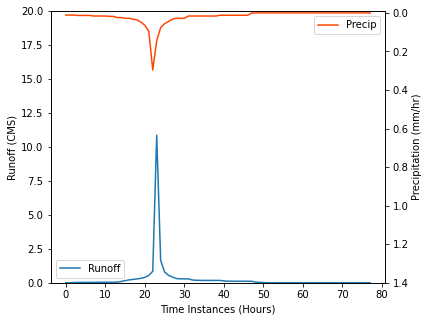

In [12]:
fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73461['Runoff (CFS)']); plt.ylim((-0.001,20)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CMS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73461['Precip (mm/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (mm/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');